<a href="https://colab.research.google.com/github/pmchhaya/ENGF2-2021/blob/master/COMP0105.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

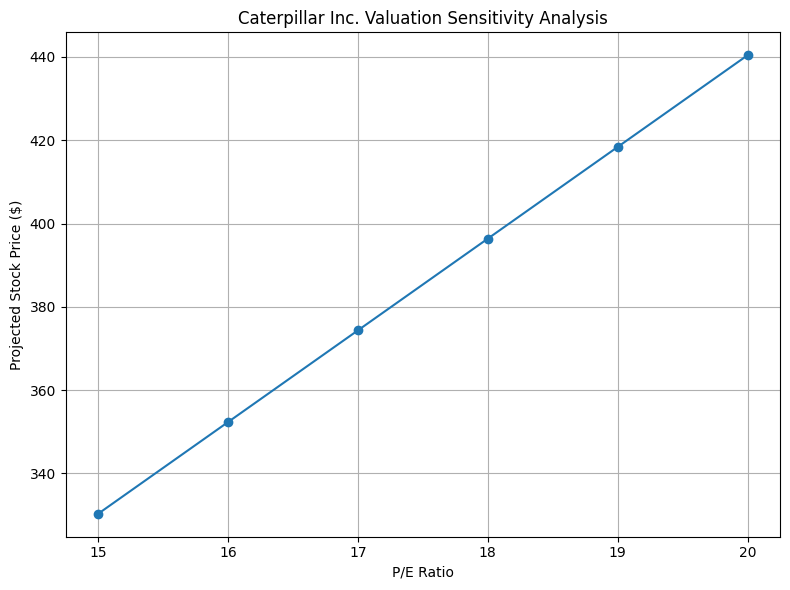

In [1]:
import matplotlib.pyplot as plt

# Define inputs for valuation analysis
eps_2025 = 22.02  # Projected EPS
pe_ratios = range(15, 21)  # P/E Ratios to test (15 to 20)
projected_prices = [eps_2025 * pe for pe in pe_ratios]

# Create the graph
plt.figure(figsize=(8, 6))
plt.plot(pe_ratios, projected_prices, marker='o')
plt.title("Caterpillar Inc. Valuation Sensitivity Analysis")
plt.xlabel("P/E Ratio")
plt.ylabel("Projected Stock Price ($)")
plt.grid(True)
plt.xticks(pe_ratios)
plt.tight_layout()

plt.show()


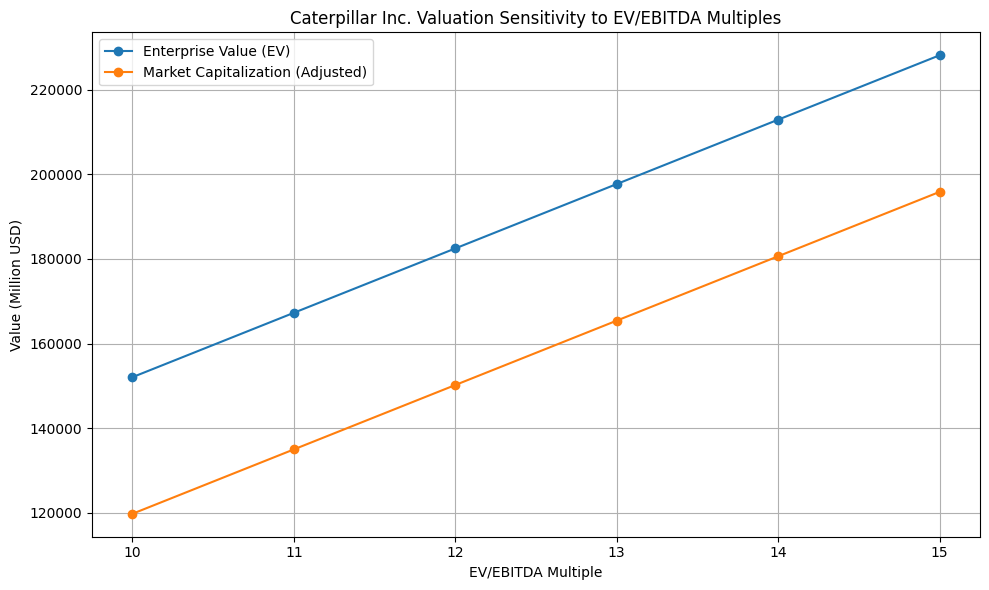

In [2]:
import matplotlib.pyplot as plt

# Financial data
ebitda_2025 = 15207.06  # Projected EBITDA for 2025 (million USD)
cash_2025 = 5638  # Projected Cash & Equivalents (million USD)
debt_2025 = 37901  # Projected Total Debt (million USD)

# Define EV/EBITDA multiples
ev_ebitda_multiples = range(10, 16)  # EV/EBITDA multiples from 10x to 15x

# Calculate EV and Market Capitalization
ev_2025 = [ebitda_2025 * multiple for multiple in ev_ebitda_multiples]
market_cap_2025 = [ev - debt_2025 + cash_2025 for ev in ev_2025]

# Plot the sensitivity analysis
plt.figure(figsize=(10, 6))

# Plot EV
plt.plot(ev_ebitda_multiples, ev_2025, marker='o', label='Enterprise Value (EV)')
# Plot Market Cap
plt.plot(ev_ebitda_multiples, market_cap_2025, marker='o', label='Market Capitalization (Adjusted)')

# Graph details
plt.title("Caterpillar Inc. Valuation Sensitivity to EV/EBITDA Multiples")
plt.xlabel("EV/EBITDA Multiple")
plt.ylabel("Value (Million USD)")
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()


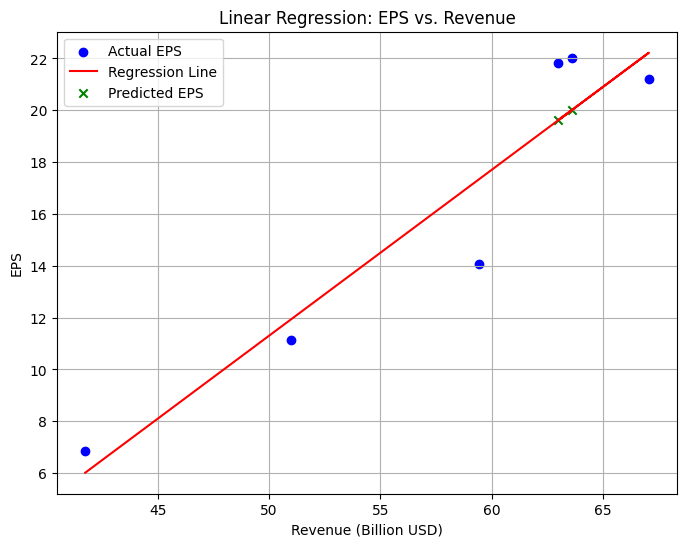

Predicted EPS for 2024: 19.61143927296315
Predicted EPS for 2025: 20.02186134144588


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

revenue = np.array([41.748, 50.971, 59.427, 67.060, 62.985, 63.626]).reshape(-1, 1)  # Revenue (2020 to 2025)
eps = np.array([6.86, 11.15, 14.07, 21.20, 21.82, 22.02])  # EPS (2020 to 2025)

# train regression model
model = LinearRegression()
model.fit(revenue, eps)

#  EPS for 2024 and 2025 revenues
projected_revenues = np.array([62.985, 63.626]).reshape(-1, 1)
predicted_eps = model.predict(projected_revenues)

plt.figure(figsize=(8, 6))
plt.scatter(revenue, eps, color='blue', label='Actual EPS')
plt.plot(revenue, model.predict(revenue), color='red', label='Regression Line')
plt.scatter(projected_revenues, predicted_eps, color='green', label='Predicted EPS', marker='x')
plt.title("Linear Regression: EPS vs. Revenue")
plt.xlabel("Revenue (Billion USD)")
plt.ylabel("EPS")
plt.legend()
plt.grid(True)
plt.show()

print("Predicted EPS for 2024:", predicted_eps[0])
print("Predicted EPS for 2025:", predicted_eps[1])


<ipython-input-5-461c2ab0b4a1>:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  index=pd.date_range(start="2020", end="2024", freq="Y")
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
<ipython-input-5-461c2ab0b4a1>:45: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  pd.date_range(start="2024", end="2026", freq="Y"),


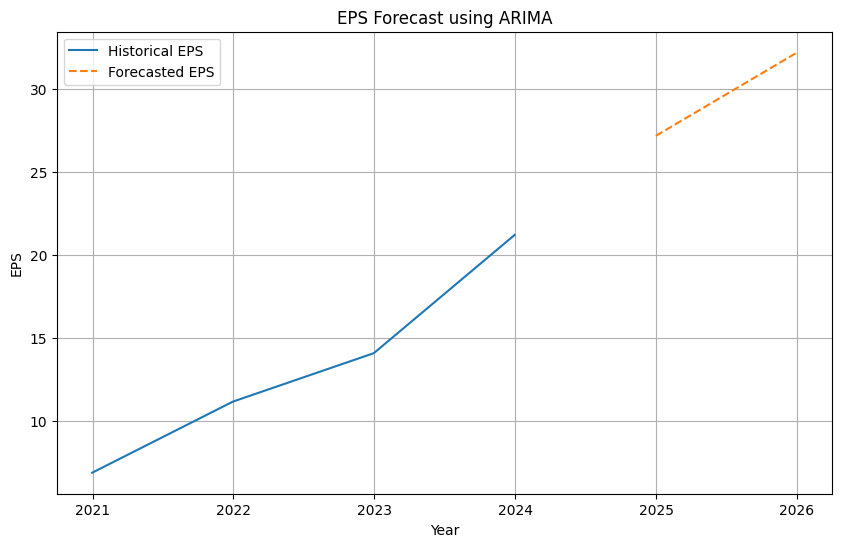

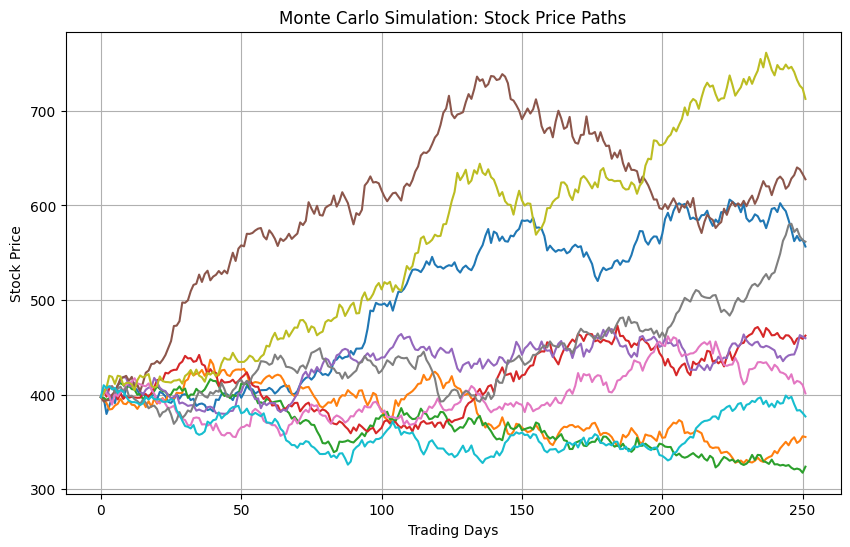

Forecasted EPS for 2024: 27.178136727188164
Forecasted EPS for 2025: 32.190495595192814
Monte Carlo Simulation - Mean Final Stock Price: 425.0772980648842
Monte Carlo Simulation - Std Dev of Final Stock Price: 86.7702111490546


<ipython-input-5-461c2ab0b4a1>:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Forecasted EPS for 2024:", eps_forecast[0])
<ipython-input-5-461c2ab0b4a1>:66: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Forecasted EPS for 2025:", eps_forecast[1])


In [5]:
# Time Series Forecasting for EPS using ARIMA and Monte Carlo Simulation for Stock Price

import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# EPS data (2020-2023)
eps_data = pd.Series(
    [6.86, 11.15, 14.07, 21.20],
    index=pd.date_range(start="2020", end="2024", freq="Y")
)

# EPS Forecasting
model = ARIMA(eps_data, order=(1, 1, 0))  # ARIMA(1,1,0) as starting point
model_fit = model.fit()

# Forecast EPS for the next two years (2024, 2025)
forecast_steps = 2
eps_forecast = model_fit.forecast(steps=forecast_steps)

# Monte Carlo Simulation for Stock Price
# Assumptions
initial_price = 397.49  # Current stock price in USD
volatility = 0.2 # Annualized volatility (assumed)
drift = 0.05  # Annualized drift (assumed growth rate)
time_horizon = 1  # Forecasting one year
steps = 252  # Trading days in a year
simulations = 1000  # Number of simulations

# Simulating stock price paths
daily_drift = drift / steps
daily_volatility = volatility / np.sqrt(steps)
price_paths = np.zeros((steps, simulations))
price_paths[0] = initial_price

for t in range(1, steps):
    random_shocks = np.random.normal(0, 1, simulations)
    price_paths[t] = price_paths[t - 1] * np.exp(daily_drift + daily_volatility * random_shocks)

# EPS Forecast
plt.figure(figsize=(10, 6))
plt.plot(eps_data, label='Historical EPS')
plt.plot(
    pd.date_range(start="2024", end="2026", freq="Y"),
    eps_forecast, label='Forecasted EPS', linestyle='--'
)
plt.title("EPS Forecast using ARIMA")
plt.xlabel("Year")
plt.ylabel("EPS")
plt.legend()
plt.grid(True)
plt.show()

# Monte Carlo Simulation
plt.figure(figsize=(10, 6))
plt.plot(price_paths[:, :10])  # Plot first 10 simulations
plt.title("Monte Carlo Simulation: Stock Price Paths")
plt.xlabel("Trading Days")
plt.ylabel("Stock Price")
plt.grid(True)
plt.show()

# predicted EPS and Monte Carlo summary
print("Forecasted EPS for 2024:", eps_forecast[0])
print("Forecasted EPS for 2025:", eps_forecast[1])
print("Monte Carlo Simulation - Mean Final Stock Price:", np.mean(price_paths[-1]))
print("Monte Carlo Simulation - Std Dev of Final Stock Price:", np.std(price_paths[-1]))
